<a href="https://colab.research.google.com/github/eoinleen/biochem-general/blob/main/20250115_plotting_Affin_Chrom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

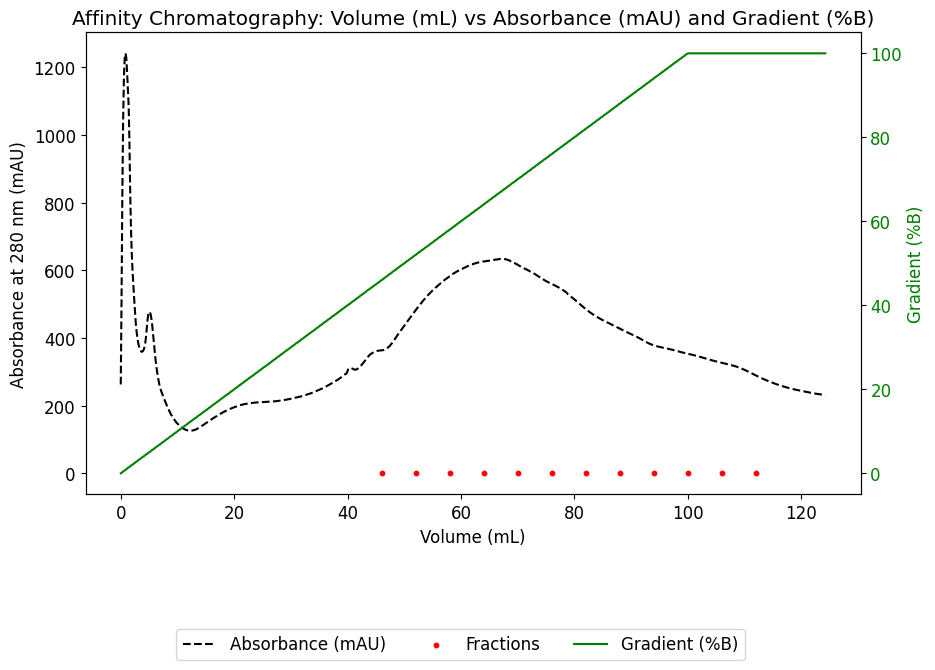

First 100 rows of ml_frac and Fractions data:
 ml_frac  Fractions
    0.00        1.0
    2.00        2.0
    3.99        3.0
    6.00        4.0
    8.00        5.0
    9.99        6.0
   11.99        7.0
   13.99        8.0
   15.99        9.0
   17.99       10.0
   20.00       11.0
   22.00       12.0
   24.00       13.0
   26.00       14.0
   28.00       15.0
   30.00       16.0
   32.00       17.0
   34.00       18.0
   36.00       19.0
   38.00       20.0
   40.00       21.0
   42.00       22.0
   44.00       23.0
   46.00       24.0
   48.00       25.0
   50.00       26.0
   52.00       27.0
   54.00       28.0
   56.00       29.0
   58.00       30.0
   60.00       31.0
   62.00       32.0
   64.00       33.0
   66.00       34.0
   68.00       35.0
   70.00       36.0
   72.00       37.0
   74.00       38.0
   76.00       39.0
   78.00       40.0
   80.00       41.0
   82.00       42.0
   84.00       43.0
   86.00       44.0
   87.99       45.0
   89.99       46.0
   91.99      

In [6]:
"""
This code was collaboratively developed with significant contributions from Copilot, an AI companion created by Microsoft, under the interactive guidance of Dr. Eoin Leen, University of Leeds. It is designed to process raw data from an affinity chromatography AKTA run in `.xls` format, plot the data, and display specific fractions for analysis.

### Detailed Breakdown:

1. **Importing Libraries**:
   The necessary libraries are imported at the beginning of the code:
   - `pandas` for data manipulation and analysis.
   - `matplotlib.pyplot` for creating plots.

2. **Reading the Data**:
   The code specifies and reads the data file using `pandas`. The file is assumed to be in `.xls` format, and the data starts from the third row (hence `header=2`).

3. **Data Preprocessing**:
   Specific columns are converted to numeric types to ensure proper handling and plotting of data.

4. **Filtering Data**:
   A specific range of fraction values is defined, and the DataFrame is filtered to include only rows within this range. Additionally, every x fraction is filtered within the specified range.

5. **Setting Font Properties**:
   Font properties are set to enhance the readability of the plot.

6. **Creating the Plot**:
   The plot is generated using `matplotlib.pyplot`:
   - The primary y-axis shows the relationship between volume (mL) and absorbance (mAU) plotted as a black dashed line.
   - The secondary y-axis shows the gradient (%B) versus volume (mL).
   - Filtered fraction data is plotted as red dots at y=0 to highlight the fractions of interest.

7. **Plot Customization**:
   Additional customization includes setting the legend above the plot, making the plot background transparent, and updating axis labels.

8. **Printing Fraction Data**:
   The script prints the `ml_frac` and `Fractions` columns for the first 100 rows to aid in determining the mL values based on fraction numbers.

### Code:
"""

import pandas as pd
import matplotlib.pyplot as plt

# Use your specified file path
file_path = '/content/drive/MyDrive/SEC-data/20250115-UBA1-AFFIN.xls'
try:
    df = pd.read_excel(file_path, header=2)  # Adjust header based on where your actual data starts
except Exception as e:
    print(f"Error reading the file: {e}")
    exit()

# Define columns based on your provided data
df.columns = ['ml_1', 'mAu', 'ml_2', 'mS_cm', 'ml_3', 'MPa', 'ml_4', '%B', 'ml_frac', 'Fractions', 'ml_5', 'Set_Marks']

# Convert necessary columns to numeric types
df['ml_1'] = pd.to_numeric(df['ml_1'], errors='coerce')
df['mAu'] = pd.to_numeric(df['mAu'], errors='coerce')
df['%B'] = pd.to_numeric(df['%B'], errors='coerce')
df['ml_4'] = pd.to_numeric(df['ml_4'], errors='coerce')
df['ml_frac'] = pd.to_numeric(df['ml_frac'], errors='coerce')

# Set font properties
font = {'family': 'DejaVu Sans', 'size': 12}
plt.rc('font', **font)

# Set fraction range
fraction_start = 46  # Replace with desired start value
fraction_end = 112  # Replace with desired end value
every_x_fraction = 3  # Replace with desired interval value

# Filter the DataFrame to include only the specified range for fractions
filtered_fractions = df[(df['ml_frac'] >= fraction_start) & (df['ml_frac'] <= fraction_end)]

# Further filter to include every x fraction
filtered_fractions = filtered_fractions.iloc[::every_x_fraction, :]

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mAU vs mL on the primary y-axis using ml_1 for x-axis, with black dashed line
ax1.plot(df['ml_1'], df['mAu'], color='black', linestyle='--', label='Absorbance (mAU)')
ax1.set_xlabel('Volume (mL)')
ax1.set_ylabel('Absorbance at 280 nm (mAU)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for %B using ml_4 for x-axis
ax2 = ax1.twinx()
ax2.plot(df['ml_4'], df['%B'], color='green', label='Gradient (%B)')
ax2.set_ylabel('Gradient (%B)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add filtered fractions as red dots at y=0
ax1.scatter(filtered_fractions['ml_frac'], [0]*len(filtered_fractions), color='red', s=10, label='Fractions', zorder=3)

# Set the background to transparent
fig.patch.set_alpha(0.0)
ax1.patch.set_alpha(0.0)
ax2.patch.set_alpha(0.0)

# Remove grid lines
ax1.grid(False)

# Update plot title
plt.title('Affinity Chromatography: Volume (mL) vs Absorbance (mAU) and Gradient (%B)')

# Add legend above the graph
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Save the plot as an image file
plt.savefig('affinity_chromatography_plot_with_fractions.png', format='png', transparent=True, bbox_inches='tight')

plt.show()

# Print the first 100 rows of ml_frac and Fractions columns
print("First 100 rows of ml_frac and Fractions data:")
print(df[['ml_frac', 'Fractions']].head(100).to_string(index=False))
